# Examen
Pequeña descripción

# Librearías

In [2]:
# Data Wrangling
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Data Viz
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "notebook_connected"

from datetime import datetime
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp 
from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import calinski_harabasz_score
import random
from collections import Counter
from sklearn.mixture import GaussianMixture

#Ambiente 
import os
pd.set_option("display.max_columns", 92)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Funciones relevantes

In [3]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table
def freq_discrete(df, features):
    for feature in features:
        print(f"Feature: {feature}")
        abs_ = df[feature].value_counts(dropna=False).to_frame().rename(columns={feature: "Absolute frequency"})
        rel_ = df[feature].value_counts(dropna=False, normalize= True).to_frame().rename(columns={feature: "Relative frequency"})
        freq = abs_.join(rel_)
        freq["Accumulated frequency"] = freq["Absolute frequency"].cumsum()
        freq["Accumulated %"] = freq["Relative frequency"].cumsum()
        freq["Absolute frequency"] = freq["Absolute frequency"].map(lambda x: "{:,.0f}".format(x))
        freq["Relative frequency"] = freq["Relative frequency"].map(lambda x: "{:,.2%}".format(x))
        freq["Accumulated frequency"] = freq["Accumulated frequency"].map(lambda x: "{:,.0f}".format(x))
        freq["Accumulated %"] = freq["Accumulated %"].map(lambda x: "{:,.2%}".format(x))
        display(freq)
        
def normalize(df, features):
    for feature in features:
        aux = df[feature].value_counts(True)
        ls_categories = [category for category, freq in aux.items() if freq > 0.05]
        df[feature] = df[feature].map(lambda x: x if x in ls_categories else "Others")
    return df

In [4]:
def hist(data, col, mrg = None):
    import plotly.express as px
    df11 = data
    fig = px.histogram(df11, x=col, marginal=mrg,hover_data=df11.columns,title = col)
    #fig.write_image(col+'_hist_.png')
    fig.show()
    
def scatter_3d(df, c0,c1,c2,color = None,title=None):
    fig = px.scatter_3d(df ,x = c0 ,y = c1 ,z = c2 ,color = color ,title = title)
    fig.write_image(title+".png")
    fig.show()

In [5]:
def perfilamiento(df,col_cl):
    cols=[x for x in list(df.filter(like="v_").columns) if x not in ["v_ID","v_Name"]]

    cols_c=list(df.filter(like="c_").columns )

    categoricas=df[cols+[col_cl]].groupby([col_cl]).agg(lambda x:counter_v(x))

    continuas=df[cols_c+[col_cl]].groupby([col_cl]).mean()

    data=continuas.merge(categoricas,left_index=True,right_index=True)
    return data

In [6]:
def codo(X,min_compo,max_compo,write = None):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(min_compo,max_compo)).fit(X)
    return visualizer.show(outpath=write+".png")


def score_calinski(X,min_compo,max_compo, write = None):
    calinski = []
    for k in list(range(min_compo, max_compo)):
        km = KMeans(n_clusters=k)
        #km.fit(X_std)
        labels = km.fit_predict(X)
        score = calinski_harabasz_score(X,labels)
        calinski.append(score)
    df_calinski=pd.DataFrame()
    df_calinski["N_Clusters"]=range(min_compo,max_compo)
    df_calinski["score"]=calinski
    fig = px.line(df_calinski, x="N_Clusters", y="score", title="Número de clusters óptimo - Calinski")
    fig.write_image(write+".png")
    
    return fig.show()
    
def silueta(df ,min_c ,max_c,write=None):
    for i in range(min_c,max_c):
        km = KMeans(i, random_state=200)
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
        visualizer.fit(df)
        print(f"N Clusters : {i}")
        print(f"Score Silueta : {round(visualizer.silhouette_score_,2)}")
        visualizer.show()


In [7]:
def hist(data, col, mrg = None):
    df11 = data
    fig = px.histogram(df11, x=col, marginal=mrg,hover_data=df11.columns,title = col)
    #fig.write_image(col+'_hist_'+'Marchan_Castrejon_Jaydy_Michell.png')
    fig.show() 

In [204]:
def counter_v(x):
    return Counter(list(x)).most_common(10)
    
def plot_v(df,col,col_cl,title=None):
    aux=df[[col,col_cl,"CLIENTNUM"]].groupby([col_cl,col]).count().reset_index()
    aux=aux.sort_values(by=["CLIENTNUM"],ascending=False)
    fig = px.bar(aux, x=col, y="CLIENTNUM", color=col_cl, title=col)
    fig.write_image(title+'.png')
    return fig


# Carga de datos

In [9]:
df = pd.read_csv('BankChurners.csv')

In [10]:
df.head()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3    12691.0000                  777       11914.0000   
1                      2     8256.0000                  864        7392.0000   
2                      0     3418.0000                    0        3418.0000   
3                      1     3313.0000                 2517         796.0000   
4                      0     4716.0000                    0        4716.0000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                1.3350             1144              42               1.6250   
1                1.5410             1291              33               3.7140   
2                2.5940             1887              20               2.3330   
3                1.4050             1171              20               2.3330   
4                2.1750              816              28               2.5000   

   Avg_Utilization_Ratio  \
0                 0.0610   
1                 0.1050   
2                 0.0000   
3                 0.7600   
4                 0.0000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                             0.0001                                                                                    
1                                             0.0001                                                                                    
2                                             0.0000                                                                                    
3                                             0.0001                                                                                    
4                                             0.0000                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                             0.9999                                                                                   
1                                             0.9999                                                                                   
2                                             1.0000                                                                                   
3                                             0.9999                                                                                   
4                                             1.0000

# Limpieza

In [11]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
        

In [12]:
df = df.drop('Attrition_Flag' ,axis=1)

## Renombrar columnas.

In [13]:
# Selecciono las columnas discretas y continuas.
dis_col =  ['Gender','Education_Level', 'Marital_Status', 'Income_Category','Card_Category' ]
con_col = [x for x in df.columns if x not in dis_col and x != 'CLIENTNUM'	]

for x in df.columns:
    dis = [f'v_{x}' for x in dis_col]
    cont = [f'c_{x}' for x in con_col]
    
df = df.rename(columns=dict(zip(dis_col,dis)))
df = df.rename(columns=dict(zip(con_col,cont)))

In [15]:
df

CLIENTNUM  c_Customer_Age v_Gender  c_Dependent_count  \
0      768805383              45        M                  3   
1      818770008              49        F                  5   
2      713982108              51        M                  3   
3      769911858              40        F                  4   
4      709106358              40        M                  3   
...          ...             ...      ...                ...   
10122  772366833              50        M                  2   
10123  710638233              41        M                  2   
10124  716506083              44        F                  1   
10125  717406983              30        M                  2   
10126  714337233              43        F                  2   

      v_Education_Level v_Marital_Status v_Income_Category v_Card_Category  \
0           High School          Married       $60K - $80K            Blue   
1              Graduate           Single    Less than $40K            Blue   
2              Graduate          Married      $80K - $120K            Blue   
3           High School          Unknown    Less than $40K            Blue   
4            Uneducated          Married       $60K - $80K            Blue   
...                 ...              ...               ...             ...   
10122          Graduate           Single       $40K - $60K            Blue   
10123           Unknown         Divorced       $40K - $60K            Blue   
10124       High School          Married    Less than $40K            Blue   
10125          Graduate          Unknown       $40K - $60K            Blue   
10126          Graduate          Married    Less than $40K          Silver   

       c_Months_on_book  c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
0                    39                           5                         1   
1                    44                           6                         1   
2                    36                           4                         1   
3                    34                           3                         4   
4                    21                           5                         1   
...                 ...                         ...                       ...   
10122                40                           3                         2   
10123                25                           4                         2   
10124                36                           5                         3   
10125                36                           4                         3   
10126                25                           6                         2   

       c_Contacts_Count_12_mon  c_Credit_Limit  c_Total_Revolving_Bal  \
0                            3      12691.0000                    777   
1                            2       8256.0000                    864   
2                            0       3418.0000                      0   
3                            1       3313.0000                   2517   
4                            0       4716.0000                      0   
...                        ...             ...                    ...   
10122                        3       4003.0000                   1851   
10123                        3       4277.0000                   2186   
10124                        4       5409.0000                      0   
10125                        3       5281.0000                      0   
10126                        4      10388.0000                   1961   

       c_Avg_Open_To_Buy  c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  \
0             11914.0000                  1.3350               1144   
1              7392.0000                  1.5410               1291   
2              3418.0000                  2.5940               1887   
3               796.0000                  1.4050               1171   
4              4716.0000                  2.1750                816   
...                  ... 

# Calidad de datos

## Unicidad

In [14]:
df.drop_duplicates().shape[0] == df.shape[0]

True

Podemos ver que no tenemos duplicados.

## Consistencia

In [15]:
aux = missing_zero_values_table(df)

Your selected dataframe has 20 columns and 10127 Rows.
There are 0 columns that have missing values.


No tenemos problemas 

# EDA

In [16]:
df[[x for x in df.columns if 'c_' in x]].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

c_Customer_Age  c_Dependent_count  c_Months_on_book  \
count      10127.0000         10127.0000        10127.0000   
mean          46.3260             2.3462           35.9284   
std            8.0168             1.2989            7.9864   
min           26.0000             0.0000           13.0000   
1%            27.0000             0.0000           15.0000   
5%            33.0000             0.0000           22.0000   
50%           46.0000             2.0000           36.0000   
95%           60.0000             4.0000           50.0000   
99%           65.0000             5.0000           56.0000   
max           73.0000             5.0000           56.0000   

       c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
count                  10127.0000                10127.0000   
mean                       3.8126                    2.3412   
std                        1.5544                    1.0106   
min                        1.0000                    0.0000   
1%                         1.0000                    1.0000   
5%                         1.0000                    1.0000   
50%                        4.0000                    2.0000   
95%                        6.0000                    4.0000   
99%                        6.0000                    6.0000   
max                        6.0000                    6.0000   

       c_Contacts_Count_12_mon  c_Credit_Limit  c_Total_Revolving_Bal  \
count               10127.0000      10127.0000             10127.0000   
mean                    2.4553       8631.9537              1162.8141   
std                     1.1062       9088.7767               814.9873   
min                     0.0000       1438.3000                 0.0000   
1%                      0.0000       1438.3000                 0.0000   
5%                      1.0000       1438.5100                 0.0000   
50%                     2.0000       4549.0000              1276.0000   
95%                     4.0000      34516.0000              2517.0000   
99%                     5.0000      34516.0000              2517.0000   
max                     6.0000      34516.0000              2517.0000   

       c_Avg_Open_To_Buy  c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  \
count         10127.0000              10127.0000         10127.0000   
mean           7469.1396                  0.7599          4404.0863   
std            9090.6853                  0.2192          3397.1293   
min               3.0000                  0.0000           510.0000   
1%              210.0780                  0.3403           869.2600   
5%              480.3000                  0.4630          1283.3000   
50%            3474.0000                  0.7360          3899.0000   
95%           32183.4000                  1.1030         14212.0000   
99%           34294.1400                  1.5147         15882.3600   
max           34516.0000                  3.3970         18484.0000   

       c_Total_Trans_Ct  c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  
count        10127.0000             10127.0000               10127.0000  
mean            64.8587                 0.7122                   0.2749  
std             23.4726                 0.2381                   0.2757  
min             10.0000                 0.0000                   0.0000  
1%              20.0000                 0.2310                   0.0000  
5%              28.0000                 0.3680                   0.0000  
50%             67.0000                 0.7020                   0.1760  
95%            105.0000                 1.0690                   0.7930  
99%            123.0000                 1.4550                   0.9057  
max            139.0000                 3.7140                   0.9990

In [19]:
c_cols = [x for x in df.columns if 'c_' in x]

In [20]:
for c in c_cols:
    hist(df, c)

    

Qué podemos observar de las gráficas?



## EDA discreta

In [21]:
def bar(data, col):
    fig  = px.bar(data, x=data.Company, y=col,title=col)
    #fig.write_image(graficas+'/'+col+'_bar_'+'_Marchan_Castrejon_Jaydy_Michell.png')
    fig.show()

In [22]:
def bar_plot(data, column, prct = False):
   import plotly.express as px
   data = pd.DataFrame(data[column].value_counts(prct))
   fig = px.bar(data, x=data.index, y=column,title=column)
   #fig.write_image(column+'_bar_'+'_Marchan_Castrejon_Jaydy_Michell.png')
   fig.show()

In [23]:
for c in [x for x in df.columns if 'v_' in x]:
    bar_plot(df,c)

In [24]:
# Checar los clientes con el producto Silver
for c in c_cols:
    hist(df[df['v_Card_Category'] == 'Silver'], c)

In [25]:
# Checar si la 
for c in c_cols:
    hist(df[df['v_Card_Category'] == 'Gold'], c)

# Outliers.

In [17]:
old_shape = df.shape[0]

In [18]:
lof = LocalOutlierFactor()

In [19]:
df['lof']= lof.fit_predict(df[[x for x in df.columns if 'c_' in x]])

In [20]:
df[df['lof'] == 1].shape[0]/old_shape

0.9900266614002172

In [21]:
df = df[df['lof'] == 1]

# Tratamiento de valores ausentes

Viendo en mi variables discretas tenemos valores de 'Unknown'

In [22]:
df.head()

CLIENTNUM  c_Customer_Age v_Gender  c_Dependent_count v_Education_Level  \
0  768805383              45        M                  3       High School   
1  818770008              49        F                  5          Graduate   
2  713982108              51        M                  3          Graduate   
3  769911858              40        F                  4       High School   
4  709106358              40        M                  3        Uneducated   

  v_Marital_Status v_Income_Category v_Card_Category  c_Months_on_book  \
0          Married       $60K - $80K            Blue                39   
1           Single    Less than $40K            Blue                44   
2          Married      $80K - $120K            Blue                36   
3          Unknown    Less than $40K            Blue                34   
4          Married       $60K - $80K            Blue                21   

   c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
0                           5                         1   
1                           6                         1   
2                           4                         1   
3                           3                         4   
4                           5                         1   

   c_Contacts_Count_12_mon  c_Credit_Limit  c_Total_Revolving_Bal  \
0                        3      12691.0000                    777   
1                        2       8256.0000                    864   
2                        0       3418.0000                      0   
3                        1       3313.0000                   2517   
4                        0       4716.0000                      0   

   c_Avg_Open_To_Buy  c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  \
0         11914.0000                  1.3350               1144   
1          7392.0000                  1.5410               1291   
2          3418.0000                  2.5940               1887   
3           796.0000                  1.4050               1171   
4          4716.0000                  2.1750                816   

   c_Total_Trans_Ct  c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  lof  
0                42                 1.6250                   0.0610    1  
1                33                 3.7140                   0.1050    1  
2                20                 2.3330                   0.0000    1  
3                20                 2.3330                   0.7600    1  
4                28                 2.5000                   0.0000    1

In [23]:
for c in [x for x in df.columns if 'v_' in x]:
    bar_plot(df,c)

NameError: name 'bar_plot' is not defined

In [33]:
import seaborn as sns

## Hot n code

In [24]:
from scipy.stats import chisquare

In [25]:
#for c in ['v_Education_Level' ,'v_Marital_Status' ,'v_Income_Category']:
df = df.apply(lambda x:x.replace('Unknown',np.nan))

In [26]:
missing_zero_values_table(df)

Your selected dataframe has 21 columns and 10026 Rows.
There are 3 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
v_Education_Level            0            1502            15.0000   
v_Income_Category            0            1098            11.0000   
v_Marital_Status             0             738             7.4000   

                   Total Zero Missing Values  % Total Zero Missing Values  \
v_Education_Level                       1502                      15.0000   
v_Income_Category                       1098                      11.0000   
v_Marital_Status                         738                       7.4000   

                  Data Type  
v_Education_Level    object  
v_Income_Category    object  
v_Marital_Status     object

In [27]:
aux = df[['v_Education_Level' ,'v_Marital_Status' ,'v_Income_Category']].copy()

In [28]:
df.fillna(method='ffill', inplace=True)

In [29]:
missing_zero_values_table(df)

Your selected dataframe has 21 columns and 10026 Rows.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []

In [30]:
chisquare(f_obs = df['v_Education_Level'].value_counts(True).sort_index().values,
          f_exp = aux['v_Education_Level'].value_counts(True).sort_index().values)

Power_divergenceResult(statistic=0.0002938961679776771, pvalue=0.9999999999212432)

In [31]:
chisquare(f_obs = df['v_Marital_Status'].value_counts(True).sort_index().values,
          f_exp = aux['v_Marital_Status'].value_counts(True).sort_index().values)

Power_divergenceResult(statistic=2.071245311138238e-06, pvalue=0.9999989643778807)

In [32]:
chisquare(f_obs = df['v_Income_Category'].value_counts(True).sort_index().values,
          f_exp = aux['v_Income_Category'].value_counts(True).sort_index().values)

Power_divergenceResult(statistic=7.382741385065415e-05, pvalue=0.9999999993187059)

No podemos rechazar la hipotesis de que ambos provienen de una misma muestra aletoria.

# Ingeniería de variables

## Normalización de variables

In [33]:
freq_discrete(df,[x for x in df.columns if 'v_' in x])

Feature: v_Gender


Absolute frequency Relative frequency Accumulated frequency Accumulated %
F              5,309             52.95%                 5,309        52.95%
M              4,717             47.05%                10,026       100.00%

Feature: v_Education_Level


Absolute frequency Relative frequency Accumulated frequency  \
Graduate                   3,686             36.76%                 3,686   
High School                2,360             23.54%                 6,046   
Uneducated                 1,726             17.22%                 7,772   
College                    1,139             11.36%                 8,911   
Post-Graduate                583              5.81%                 9,494   
Doctorate                    532              5.31%                10,026   

              Accumulated %  
Graduate             36.76%  
High School          60.30%  
Uneducated           77.52%  
College              88.88%  
Post-Graduate        94.69%  
Doctorate           100.00%

Feature: v_Marital_Status


Absolute frequency Relative frequency Accumulated frequency  \
Married               5,017             50.04%                 5,017   
Single                4,206             41.95%                 9,223   
Divorced                803              8.01%                10,026   

         Accumulated %  
Married         50.04%  
Single          91.99%  
Divorced       100.00%

Feature: v_Income_Category


Absolute frequency Relative frequency Accumulated frequency  \
Less than $40K              3,992             39.82%                 3,992   
$40K - $60K                 1,995             19.90%                 5,987   
$80K - $120K                1,682             16.78%                 7,669   
$60K - $80K                 1,540             15.36%                 9,209   
$120K +                       817              8.15%                10,026   

               Accumulated %  
Less than $40K        39.82%  
$40K - $60K           59.71%  
$80K - $120K          76.49%  
$60K - $80K           91.85%  
$120K +              100.00%

Feature: v_Card_Category


Absolute frequency Relative frequency Accumulated frequency  \
Blue                  9,357             93.33%                 9,357   
Silver                  533              5.32%                 9,890   
Gold                    116              1.16%                10,006   
Platinum                 20              0.20%                10,026   

         Accumulated %  
Blue            93.33%  
Silver          98.64%  
Gold            99.80%  
Platinum       100.00%

In [44]:
df = normalize(df,[x for x in df.columns if 'v_' in x])

# Vamos a condicionar a nuestros clientes con nuestro producto 'Blue'

In [34]:
df_blue = df[df['v_Card_Category'] == 'Blue'].reset_index(drop= True)

## Dummies.

In [35]:
df = pd.get_dummies(df,columns = [x for x in df.columns if 'v_' in x],drop_first = True )
df = df.reset_index(drop = True)


In [36]:
df_blue =  df_blue.drop('v_Card_Category', axis=1)
df_blue = pd.get_dummies(df_blue,columns = [x for x in df_blue.columns if 'v_' in x],drop_first = True )
df_blue = df_blue.reset_index(drop = True)


In [ ]:
## Eda rápido.

In [ ]:
for c in c_cols:
    hist(df_blue, c)

# Reducción de dimensiones

In [37]:
sc = StandardScaler()
mm = MinMaxScaler()

In [38]:
X = df_blue.filter(like = 'c_')
sc.fit(X)
mm.fit(X)

MinMaxScaler()

In [39]:
X_sc = pd.DataFrame(sc.transform(X),columns=X.columns,index=X.index)
X_mm = pd.DataFrame(mm.transform(X),columns=X.columns,index=X.index)

## PCA

### Stander Scaler

Text(0, 0.5, 'Varianza Explicada')

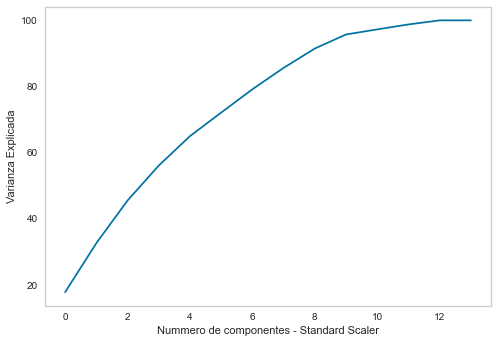

In [40]:
pca_sc = PCA(n_components=14)
pca_sc.fit(X_sc)
plt.grid()
plt.plot(np.cumsum(pca_sc.explained_variance_ratio_ * 100))
plt.xlabel('Nummero de componentes - Standard Scaler')
plt.ylabel('Varianza Explicada')

In [41]:
sum(pca_sc.explained_variance_ratio_[:3])

0.45453498271397375

In [42]:
sum(pca_sc.explained_variance_ratio_[:10])

0.9573249118480961

In [43]:
pca_sc = PCA(n_components = 10)
X_pca_sc = pd.DataFrame(pca_sc.fit_transform(X_sc))
X_pca_sc.columns=[f"componente_{x}" for x in range(10)]
print(sum(pca_sc.explained_variance_ratio_[:10]))
#pd.to_pickle(pca_sc,"../pca_sc.pkl")
#pd.to_pickle(X_pca_sc,"../X_pca_sc.pkl")

0.9573249118480962


### Min max

Text(0, 0.5, 'Varianza Explicada')

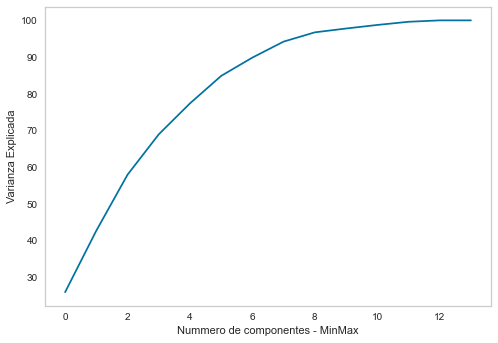

In [44]:
pca_mm = PCA(n_components=14)
pca_mm.fit(X_mm)

plt.grid()
plt.plot(np.cumsum(pca_mm.explained_variance_ratio_ * 100))
plt.xlabel('Nummero de componentes - MinMax')
plt.ylabel('Varianza Explicada')

In [45]:
sum(pca_mm.explained_variance_ratio_[:3])

0.5794264991329292

In [46]:
sum(pca_mm.explained_variance_ratio_[:9]) 

0.967355274501255

In [47]:
pca_mm = PCA(n_components = 9)
X_pca_mm = pd.DataFrame(pca_mm.fit_transform(X_mm))
X_pca_mm.columns=[f"componente_{x}" for x in range(9)]
print(sum(pca_mm.explained_variance_ratio_[:9]))
pd.to_pickle(pca_mm,"../pca_mm.pkl")
pd.to_pickle(X_pca_mm,"../X_pca_mm.pkl")

0.9673552745012559


## TSNE

In [48]:
# TSNE
tsne = TSNE(n_components=3, random_state=0)

X_tsne_sc = pd.DataFrame(tsne.fit_transform(X_sc))
X_tsne_sc.columns=["componente_1","componente_2","componente_3"]
#pd.to_pickle(X_tsne_sc,"../X_tsne_sc.pkl")

/Users/jaydymarchan/.venv/final_project/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jaydymarchan/.venv/final_project/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [49]:
# TSNE
tsne = TSNE(n_components=3, random_state=0)

X_tsne_mm = pd.DataFrame(tsne.fit_transform(X_mm))
X_tsne_mm.columns=["componente_1","componente_2","componente_3"]
#pd.to_pickle(X_tsne_mm,"../X_tsne_mm.pkl")

/Users/jaydymarchan/.venv/final_project/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jaydymarchan/.venv/final_project/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



# Número de clusters

## X_pca

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

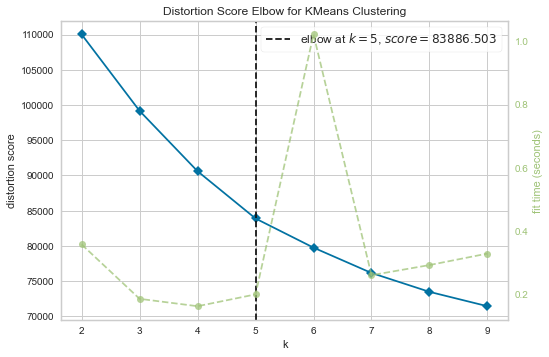

In [50]:
codo(X_pca_sc,2,10,write = 'X_pca_sc_sd')

N Clusters : 2
Score Silueta : 0.12


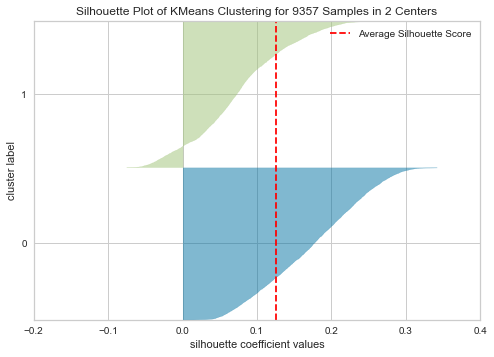

N Clusters : 3
Score Silueta : 0.12


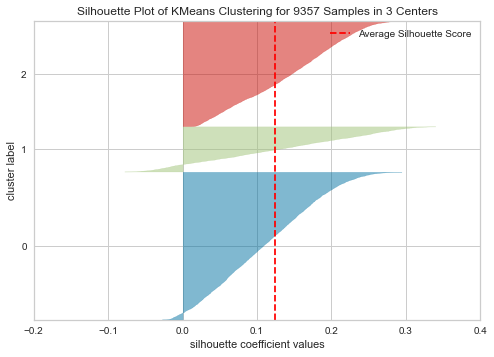

N Clusters : 4
Score Silueta : 0.14


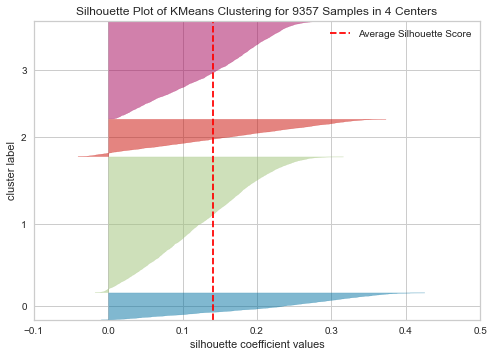

N Clusters : 5
Score Silueta : 0.13


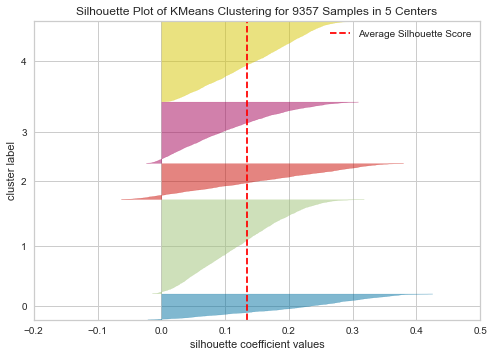

N Clusters : 6
Score Silueta : 0.13


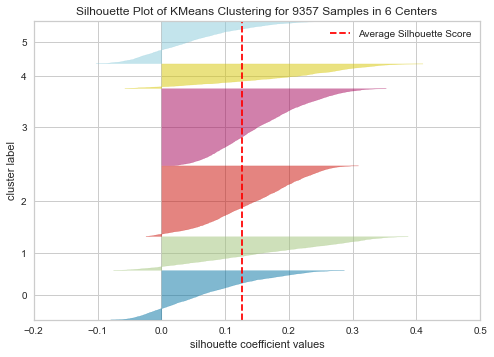

N Clusters : 7
Score Silueta : 0.13


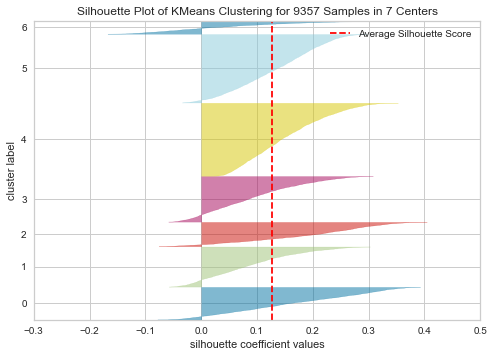

N Clusters : 8
Score Silueta : 0.12


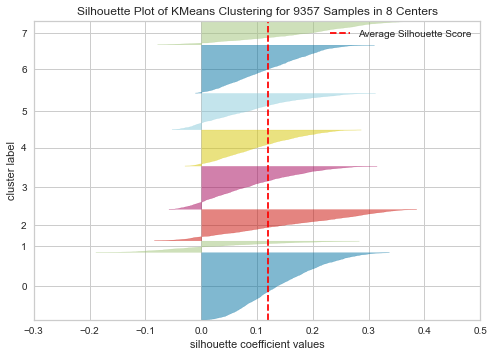

N Clusters : 9
Score Silueta : 0.11


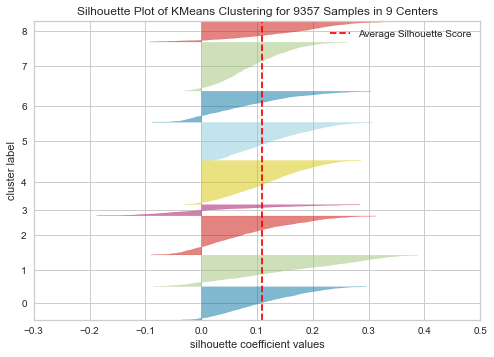

In [51]:
silueta(X_pca_sc,2,10)

In [52]:
score_calinski(X_pca_sc,2,10,'X_pca_sc_caliski')

## X_pca_mm

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

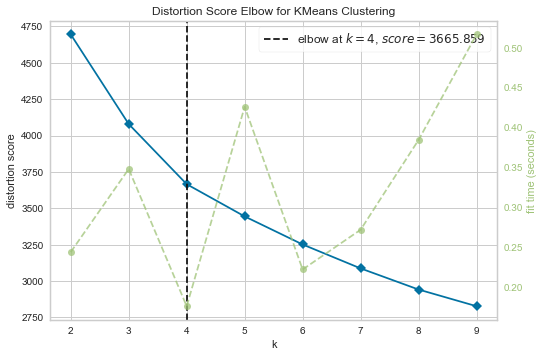

In [53]:
codo(X_pca_mm,2,10,'X_pca_mm_sd_codo')

N Clusters : 2
Score Silueta : 0.19


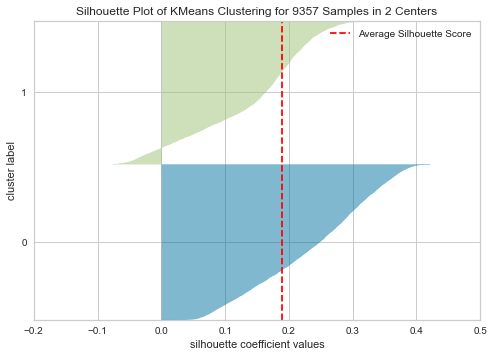

N Clusters : 3
Score Silueta : 0.2


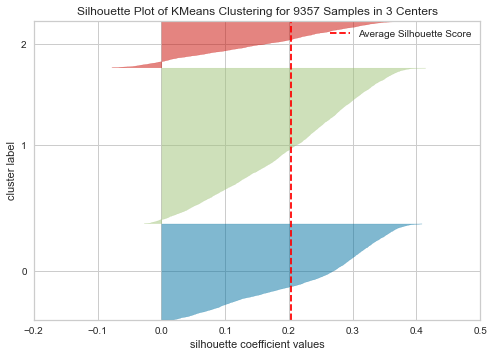

N Clusters : 4
Score Silueta : 0.18


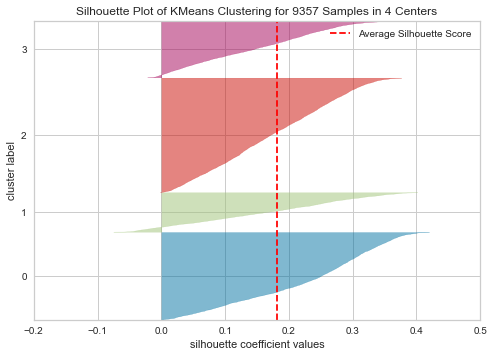

N Clusters : 5
Score Silueta : 0.16


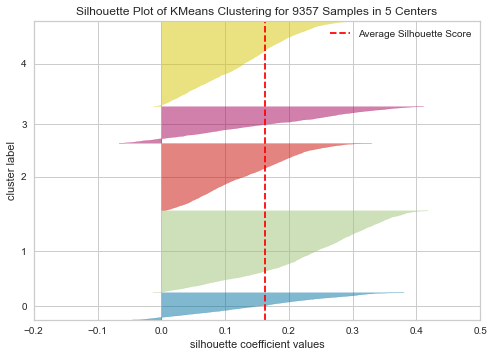

N Clusters : 6
Score Silueta : 0.16


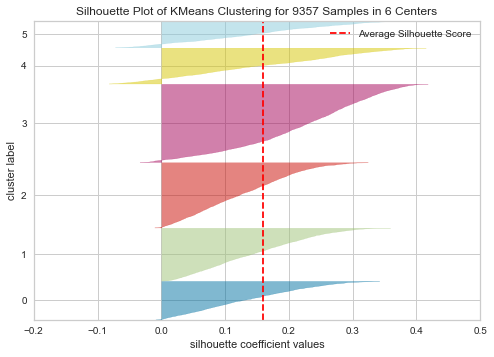

N Clusters : 7
Score Silueta : 0.14


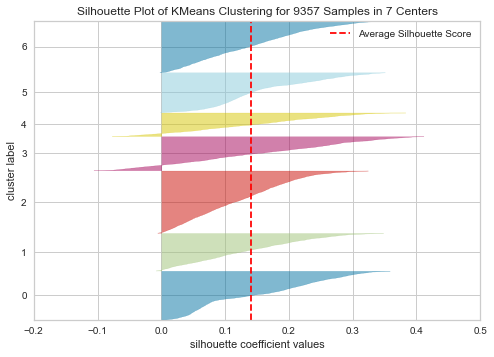

N Clusters : 8
Score Silueta : 0.14


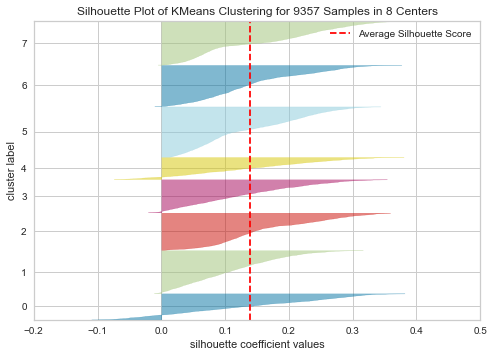

N Clusters : 9
Score Silueta : 0.14


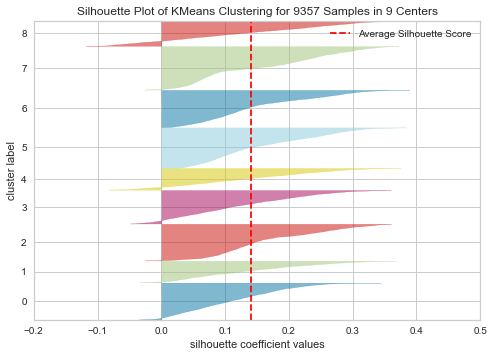

In [54]:
silueta(X_pca_mm,2,10)

In [55]:
score_calinski(X_pca_mm,2,10,'X_pca_mm_sd_calinski')

## X_tsne_sc

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

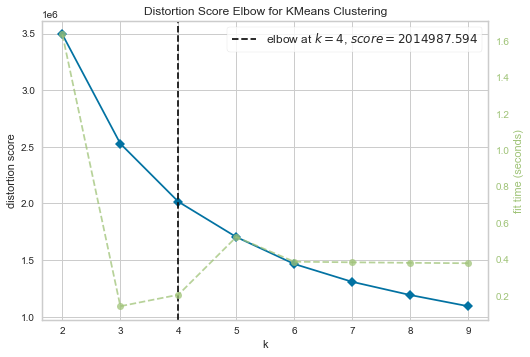

In [56]:
codo(X_tsne_sc,2,10,'X_tsne_sc_sd_codo')

N Clusters : 2
Score Silueta : 0.27000001072883606


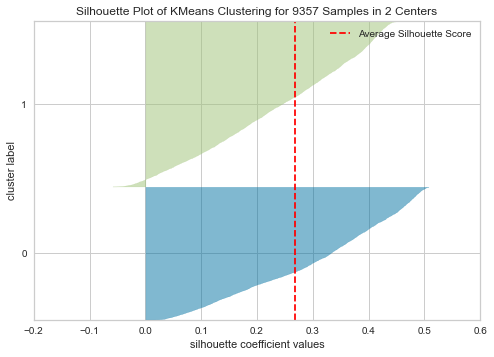

N Clusters : 3
Score Silueta : 0.28999999165534973


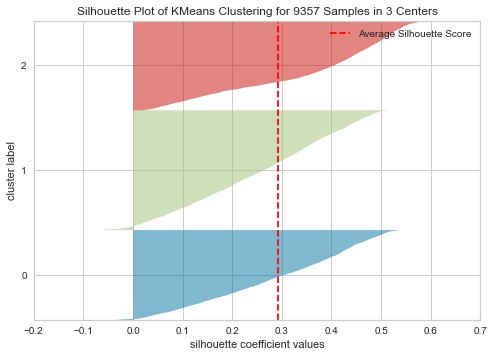

N Clusters : 4
Score Silueta : 0.3100000023841858


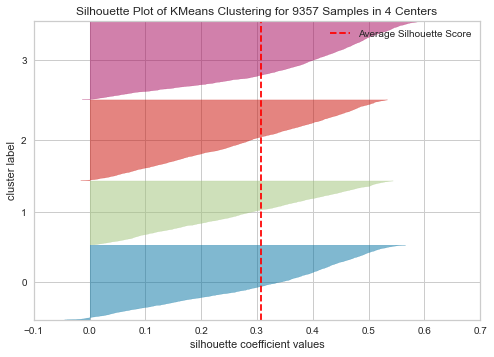

N Clusters : 5
Score Silueta : 0.30000001192092896


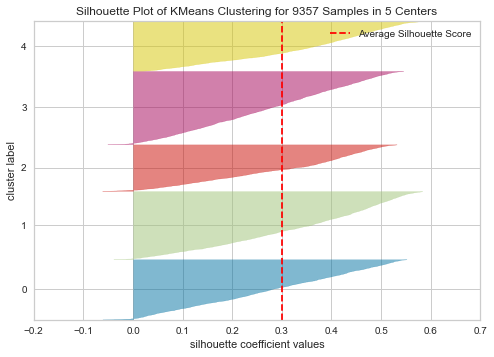

N Clusters : 6
Score Silueta : 0.30000001192092896


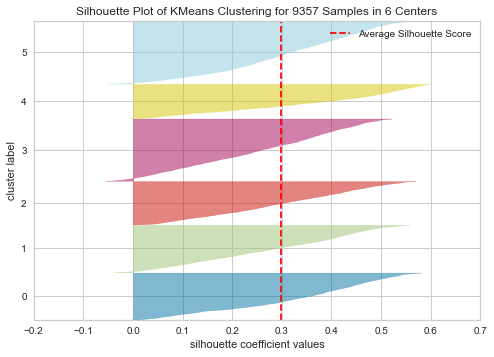

N Clusters : 7
Score Silueta : 0.30000001192092896


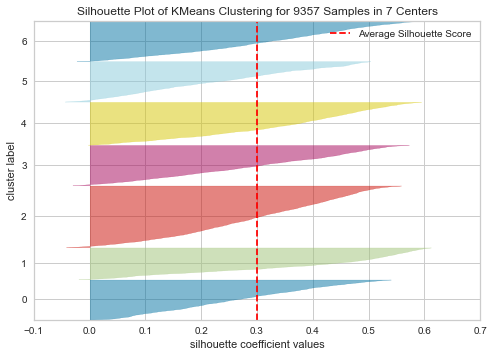

N Clusters : 8
Score Silueta : 0.28999999165534973


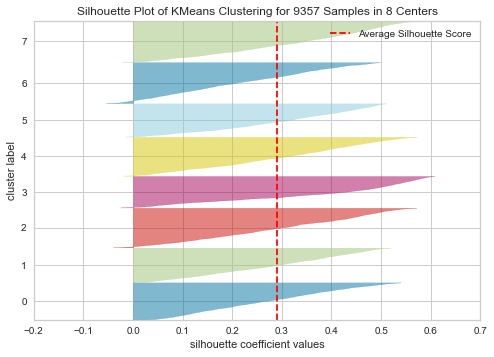

N Clusters : 9
Score Silueta : 0.28999999165534973


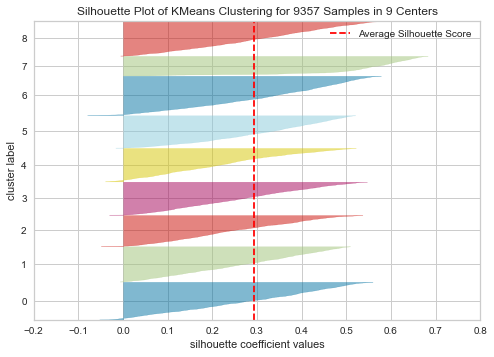

In [57]:
silueta(X_tsne_sc,2,10)

In [58]:
score_calinski(X_tsne_sc,2,10,'X_tsne_sc_sd_calinki')

## X_tsne_mm

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

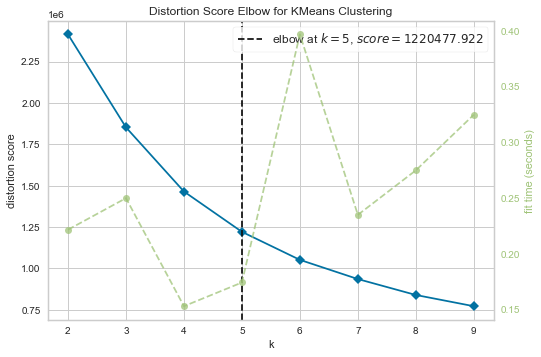

In [59]:
codo(X_tsne_mm,2,10,'X_tsne_mm_sd_codo')

N Clusters : 2
Score Silueta : 0.3100000023841858


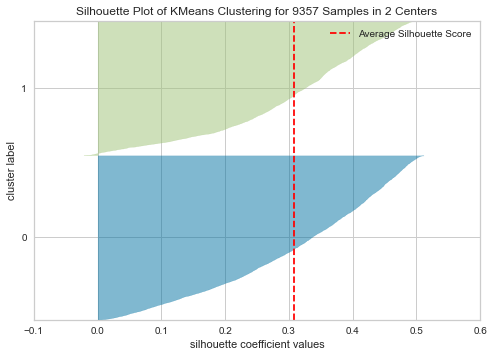

N Clusters : 3
Score Silueta : 0.30000001192092896


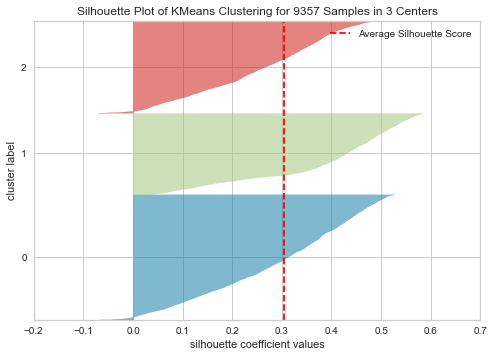

N Clusters : 4
Score Silueta : 0.3100000023841858


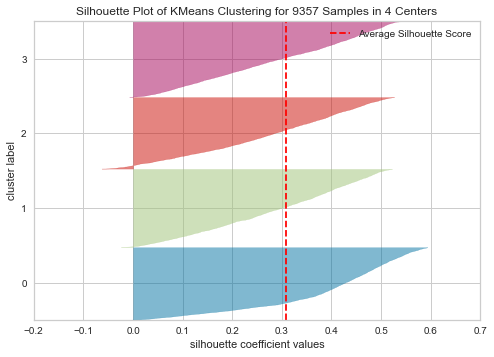

N Clusters : 5
Score Silueta : 0.3100000023841858


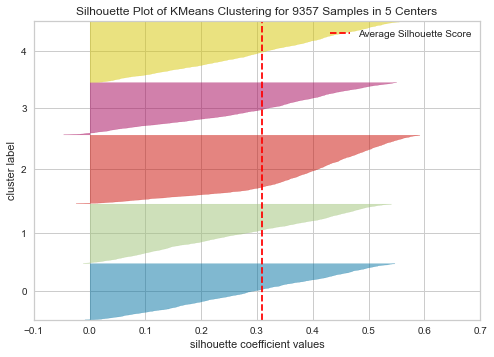

N Clusters : 6
Score Silueta : 0.3100000023841858


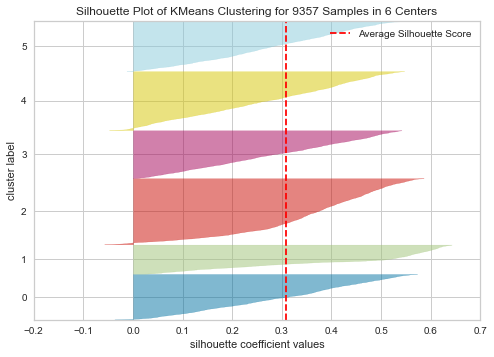

N Clusters : 7
Score Silueta : 0.30000001192092896


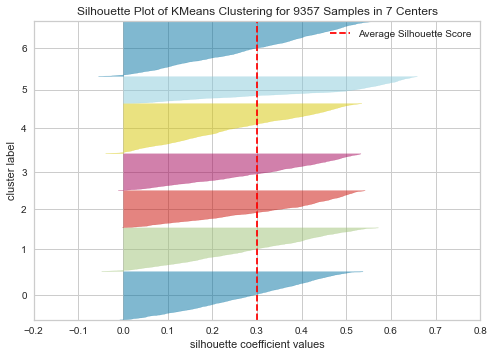

N Clusters : 8
Score Silueta : 0.30000001192092896


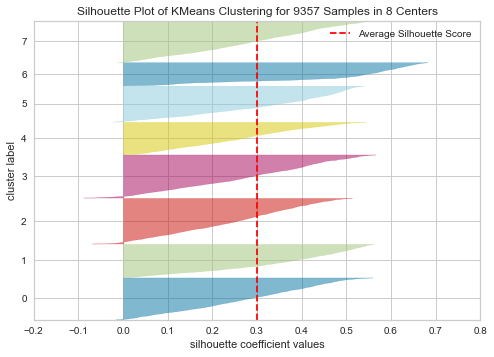

N Clusters : 9
Score Silueta : 0.30000001192092896


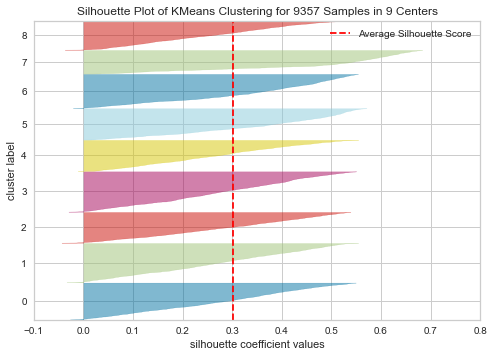

In [60]:
silueta(X_tsne_mm,2,10)

In [61]:
score_calinski(X_tsne_mm,2,10,'X_tsne_mm_sd_calinksi')

In [ ]:
df_blue.shape

(9357, 21)

## Revisar con dummies. 

In [63]:
v = [x for x in df_blue.columns if 'v_' in x]
X_pca_mm_d = X_pca_mm.merge(df_blue[v],left_index = True, right_index = True)
X_pca_sc_d = X_pca_sc.merge(df_blue[v],left_index = True, right_index = True)
X_tsne_mm_d = X_tsne_mm.merge(df_blue[v],left_index = True, right_index = True)
X_tsne_sc_d = X_tsne_sc.merge(df_blue[v],left_index = True, right_index = True)

### X_pca_sc

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

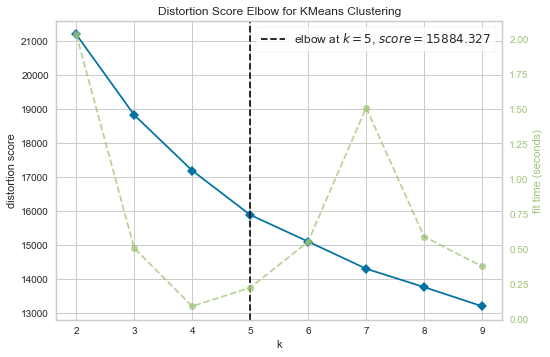

In [66]:
codo(X_pca_mm_d,2,10,'sin_dimmies')

N Clusters : 2
Score Silueta : 0.16


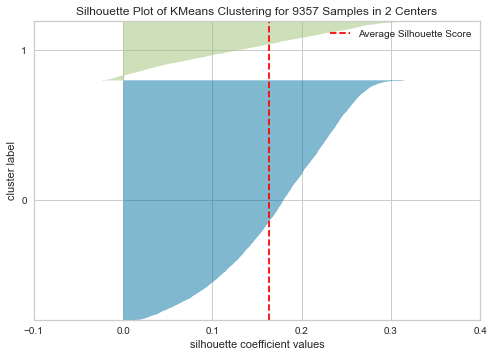

N Clusters : 3
Score Silueta : 0.11


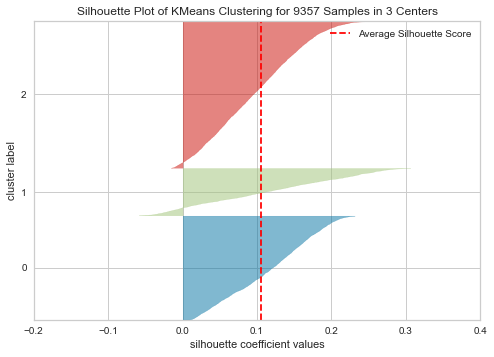

N Clusters : 4
Score Silueta : 0.12


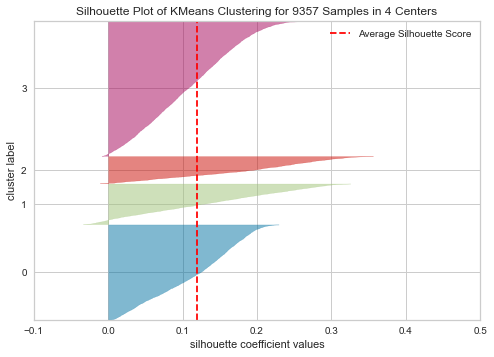

N Clusters : 5
Score Silueta : 0.11


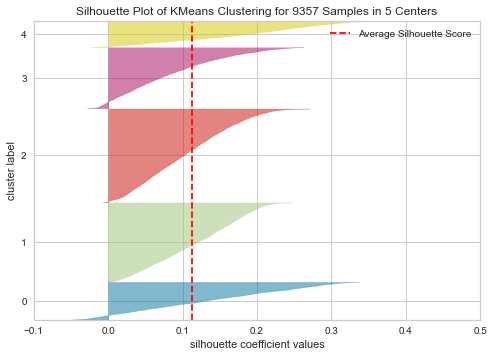

N Clusters : 6
Score Silueta : 0.11


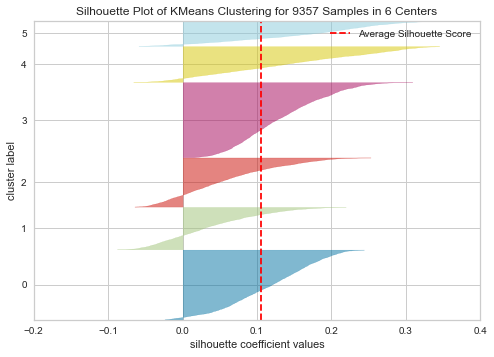

N Clusters : 7
Score Silueta : 0.11


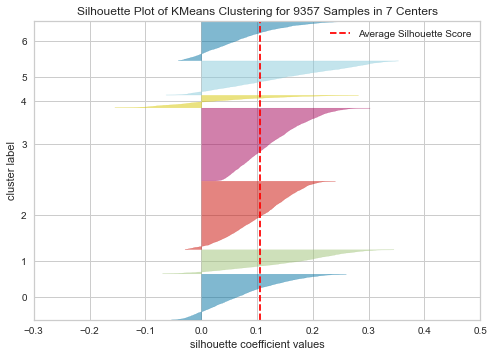

N Clusters : 8
Score Silueta : 0.1


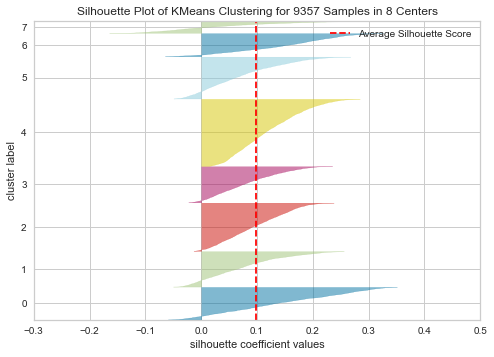

N Clusters : 9
Score Silueta : 0.09


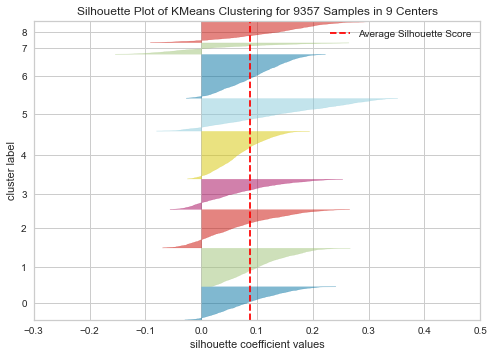

In [67]:
silueta(X_pca_sc_d,2,10 )

In [68]:
score_calinski(X_pca_sc_d,2,10,'X_pca_sc_d')

### X_pca_mm_d

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

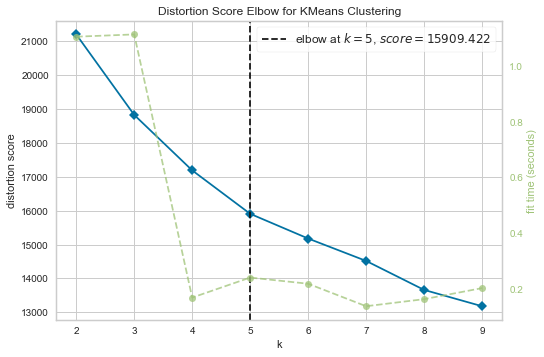

In [69]:
codo(X_pca_mm_d,2,10,'X_pca_mm_d')

N Clusters : 2
Score Silueta : 0.16


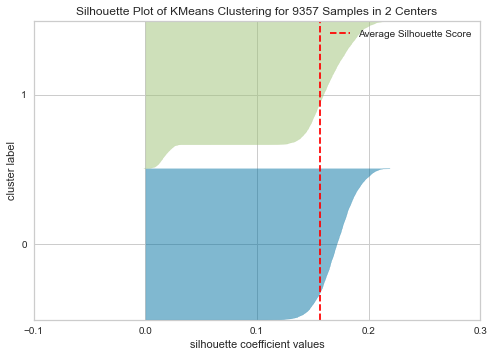

N Clusters : 3
Score Silueta : 0.16


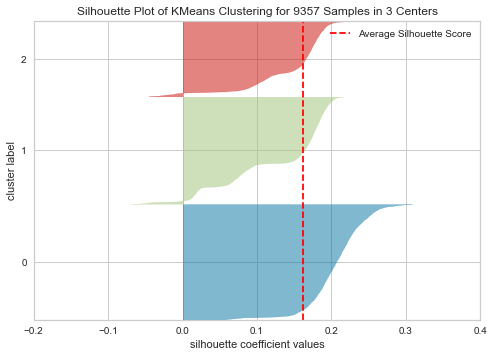

N Clusters : 4
Score Silueta : 0.16


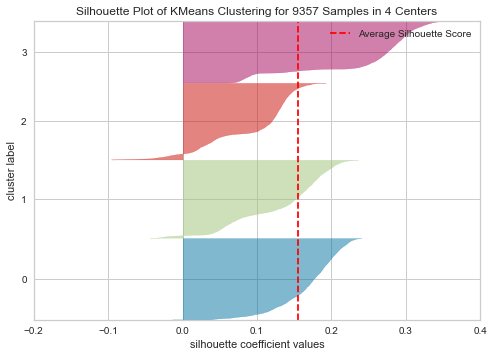

N Clusters : 5
Score Silueta : 0.17


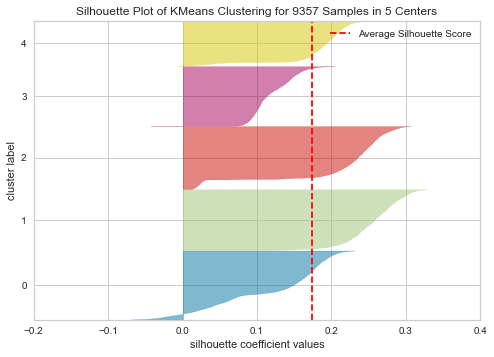

N Clusters : 6
Score Silueta : 0.17


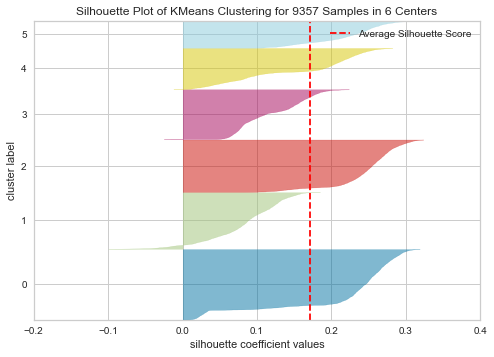

N Clusters : 7
Score Silueta : 0.17


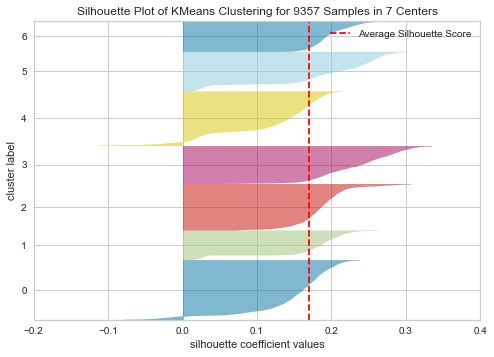

N Clusters : 8
Score Silueta : 0.17


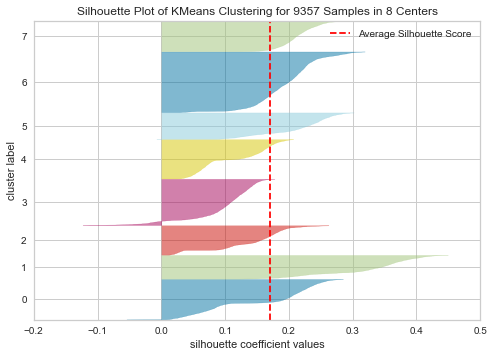

N Clusters : 9
Score Silueta : 0.17


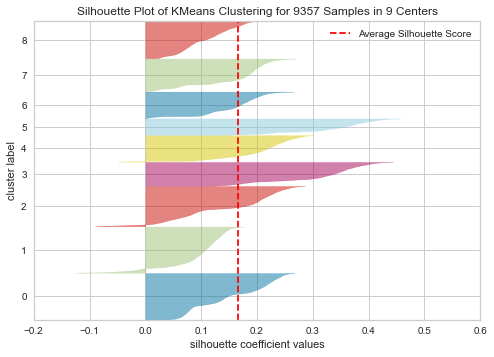

In [70]:
silueta(X_pca_mm_d,2,10)

In [71]:
score_calinski(X_pca_mm_d,2,10,'X_pca_mm_d')

### X_tsne_sc_d

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

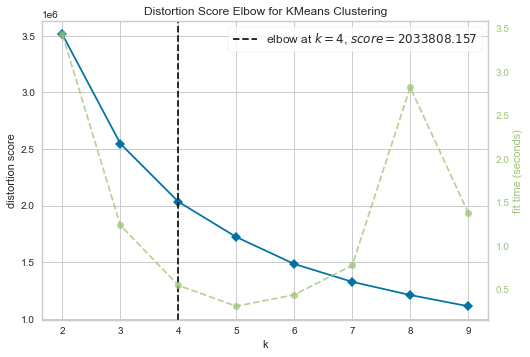

In [72]:
codo(X_tsne_sc_d,2,10,'X_tsne_sc_d')

N Clusters : 2
Score Silueta : 0.27000001072883606


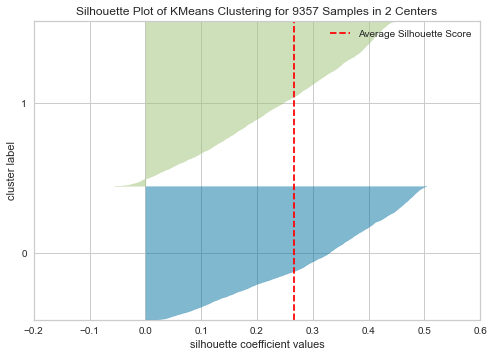

N Clusters : 3
Score Silueta : 0.28999999165534973


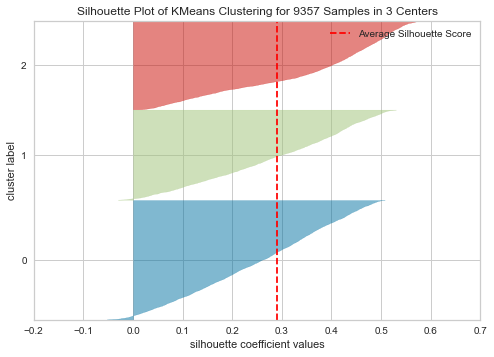

N Clusters : 4
Score Silueta : 0.30000001192092896


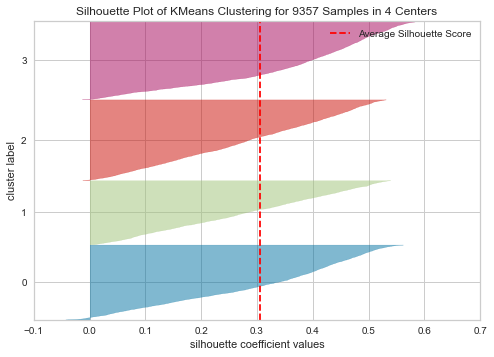

N Clusters : 5
Score Silueta : 0.30000001192092896


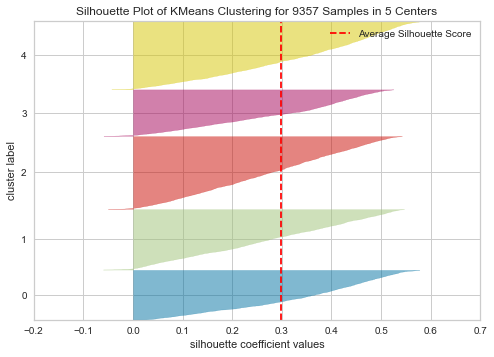

N Clusters : 6
Score Silueta : 0.28999999165534973


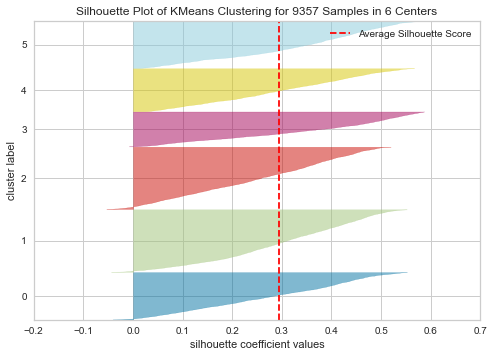

N Clusters : 7
Score Silueta : 0.30000001192092896


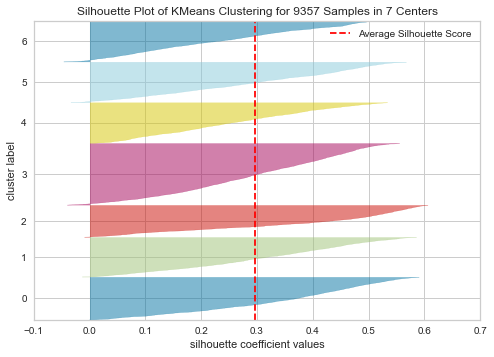

N Clusters : 8
Score Silueta : 0.28999999165534973


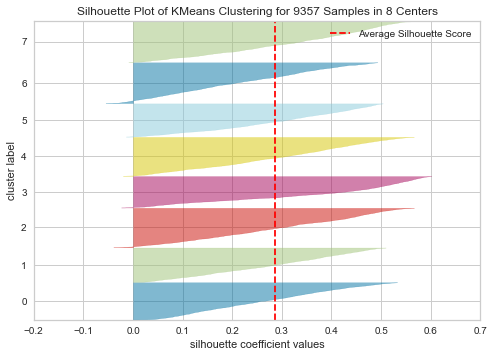

N Clusters : 9
Score Silueta : 0.28999999165534973


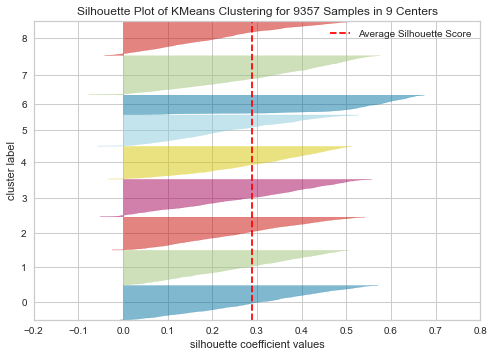

In [73]:
silueta(X_tsne_sc_d,2,10)

In [74]:
score_calinski(X_tsne_sc_d,2,10,'X_tsne_sc_d')

### X_tsne_mm_d

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

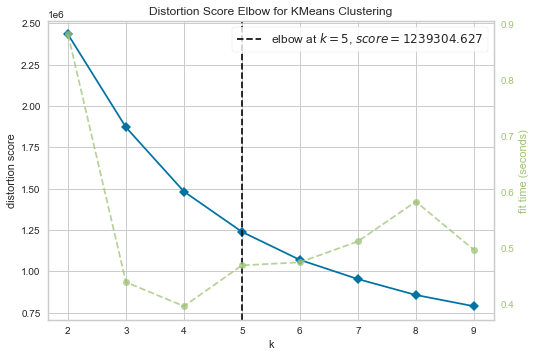

In [75]:
codo(X_tsne_mm_d,2,10,'X_tsne_mm_d')

N Clusters : 2
Score Silueta : 0.3100000023841858


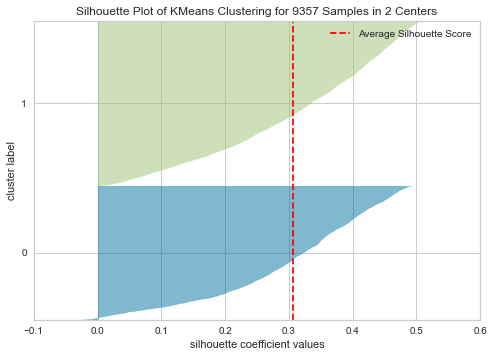

N Clusters : 3
Score Silueta : 0.30000001192092896


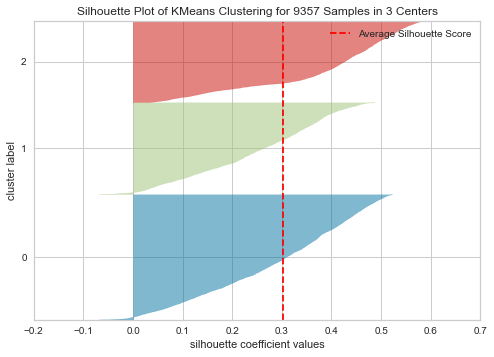

N Clusters : 4
Score Silueta : 0.3100000023841858


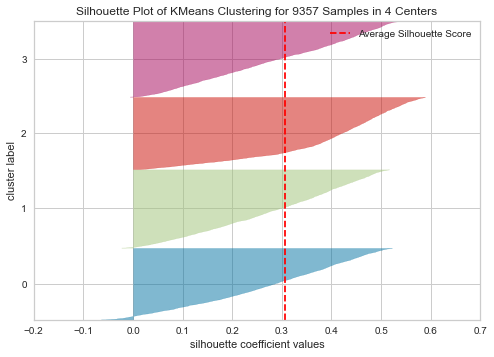

N Clusters : 5
Score Silueta : 0.30000001192092896


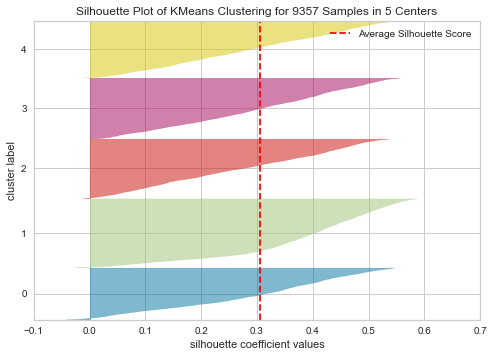

N Clusters : 6
Score Silueta : 0.30000001192092896


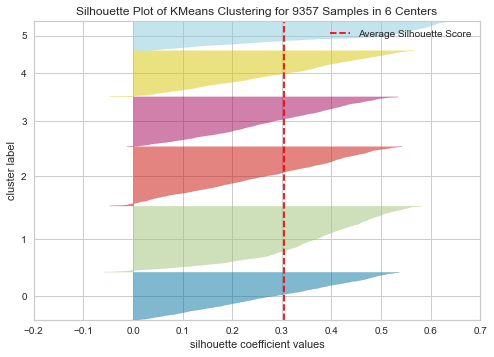

N Clusters : 7
Score Silueta : 0.30000001192092896


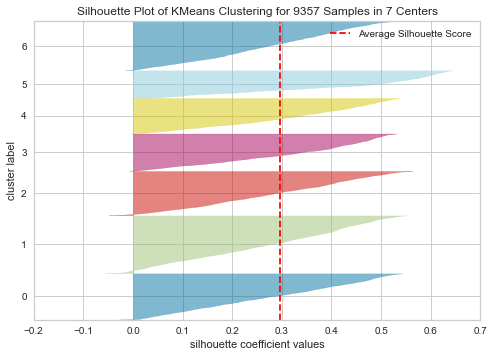

N Clusters : 8
Score Silueta : 0.28999999165534973


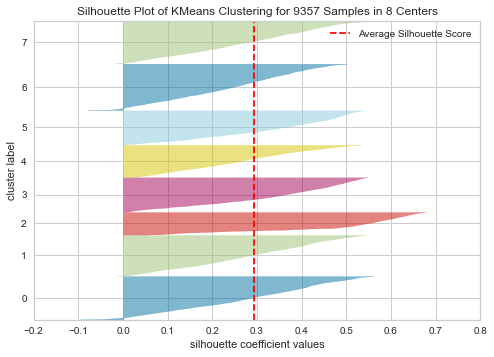

N Clusters : 9
Score Silueta : 0.28999999165534973


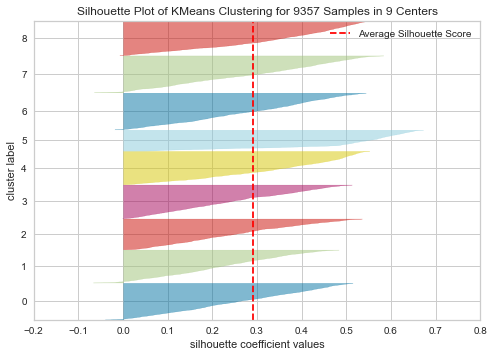

In [76]:
silueta(X_tsne_mm_d,2,10)

In [77]:
score_calinski(X_tsne_mm_d,2,10,'X_tsne_mm_d')

# Clusters

In [78]:
dataframes = [X_tsne_sc
                ,X_tsne_mm
                ,X_tsne_mm
                ,X_pca_sc_d
                ,X_pca_sc_d
                ,X_pca_mm ]
              
combinaciones = [['tsne_sc4_sd',4],['tsne_mm_5',5], ['tsne_mm_2',2]
                    ,['pca_sc2_d',2] ,['pca_sc5_d',5] ,['pca_mm5_d',5] ]

In [80]:
for i in range(len(combinaciones)):
    print("KMEANS")
    print(combinaciones[i][0])
    km=KMeans(n_clusters=combinaciones[i][1],random_state=200)
    name="cl_km_"+combinaciones[i][0]
    km.fit(dataframes[i])
    #pd.to_pickle(km,f"../practicas/practica 2/clases/kmeans_{name}.pkl")

    df_blue[name]=km.predict(dataframes[i])
    display(df_blue[name].value_counts(1))
    
    
    gmm = GaussianMixture(n_components=combinaciones[i][1],random_state=2)
    gmm.fit(dataframes[i])
    name="cl_gmm_"+combinaciones[i][0]
    #pd.to_pickle(gmm,f"../practicas/practica 2/clases/GMM_{name}.pkl")
    df_blue[name]=gmm.predict(dataframes[i])
    display(df_blue[name].value_counts(1))

KMEANS
tsne_sc4_sd


2   0.2715
3   0.2620
0   0.2517
1   0.2148
Name: cl_km_tsne_sc4_sd, dtype: float64

0   0.3132
1   0.2353
2   0.2289
3   0.2225
Name: cl_gmm_tsne_sc4_sd, dtype: float64

KMEANS
tsne_mm_5


2   0.2308
4   0.2043
1   0.1995
0   0.1895
3   0.1758
Name: cl_km_tsne_mm_5, dtype: float64

3   0.2306
0   0.2275
2   0.2007
4   0.2003
1   0.1409
Name: cl_gmm_tsne_mm_5, dtype: float64

KMEANS
tsne_mm_2


0   0.5507
1   0.4493
Name: cl_km_tsne_mm_2, dtype: float64

0   0.6005
1   0.3995
Name: cl_gmm_tsne_mm_2, dtype: float64

KMEANS
pca_sc2_d


0   0.8036
1   0.1964
Name: cl_km_pca_sc2_d, dtype: float64

0   0.6075
1   0.3925
Name: cl_gmm_pca_sc2_d, dtype: float64

KMEANS
pca_sc5_d


2   0.3151
1   0.2663
3   0.2051
0   0.1266
4   0.0869
Name: cl_km_pca_sc5_d, dtype: float64

4   0.5068
2   0.2956
1   0.1300
3   0.0357
0   0.0320
Name: cl_gmm_pca_sc5_d, dtype: float64

KMEANS
pca_mm5_d


4   0.2852
1   0.2748
2   0.2253
3   0.1230
0   0.0917
Name: cl_km_pca_mm5_d, dtype: float64

4   0.2852
3   0.2301
0   0.1747
1   0.1665
2   0.1434
Name: cl_gmm_pca_mm5_d, dtype: float64

# Visualizacion de clusters

## K-means.

In [83]:
opciones=['cl_km_tsne_sc4_sd',
 'cl_km_tsne_mm_5',
 'cl_km_tsne_mm_2']

dataframes = [X_tsne_mm,X_tsne_sc]

In [85]:
for i in opciones:
    if "sc" in i:
        data_aux=dataframes[1]
    else:
        data_aux=dataframes[0]
    
    data_aux[i]=df_blue[i]
    scatter_3d(data_aux,'componente_1', 'componente_2', 'componente_3', color=i , title=i)

### GMM

In [88]:
opciones=['cl_gmm_tsne_sc4_sd',
 'cl_gmm_tsne_mm_5',
 'cl_gmm_tsne_mm_2']

dataframes = [X_tsne_mm,X_tsne_sc]

In [89]:
for i in opciones:
    if "sc" in i:
        data_aux=dataframes[1]
    else:
        data_aux=dataframes[0]
    
    data_aux[i]=df_blue[i]
    scatter_3d(data_aux,'componente_1', 'componente_2', 'componente_3', color=i , title=i)

# Perfilamiento

In [92]:
[x for x in df_blue.columns if 'cl_' in x]

['cl_km_tsne_sc4_sd',
 'cl_gmm_tsne_sc4_sd',
 'cl_km_tsne_mm_5',
 'cl_gmm_tsne_mm_5',
 'cl_km_tsne_mm_2',
 'cl_gmm_tsne_mm_2',
 'cl_km_pca_sc2_d',
 'cl_gmm_pca_sc2_d',
 'cl_km_pca_sc5_d',
 'cl_gmm_pca_sc5_d',
 'cl_km_pca_mm5_d',
 'cl_gmm_pca_mm5_d']

# Perfilamiento

In [95]:
best_km = ['cl_km_tsne_sc4_sd',
'cl_km_tsne_mm_5']

In [94]:
best_gmm = ['cl_gmm_tsne_sc4_sd',
'cl_gmm_tsne_mm_5']

In [97]:
for i in best_km:
    print(i.title())
    display(perfilamiento(df_blue,i))

Cl_Km_Tsne_Sc4_Sd


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_km_tsne_sc4_sd                                                        
0                         45.9732             2.5278           35.6395   
1                         41.3388             2.2796           31.2597   
2                         50.0102             2.3102           39.3445   
3                         47.1440             2.2206           36.6362   

                   c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_km_tsne_sc4_sd                                                         
0                                      3.3775                    2.2085   
1                                      4.2871                    2.2622   
2                                      3.9374                    2.5016   
3                                      3.8728                    2.3756   

                   c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_km_tsne_sc4_sd                                            
0                                   2.3945      15962.6586   
1                                   2.6612       4534.3344   
2                                   2.2874       3600.7159   
3                                   2.5232       5184.6856   

                   c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_km_tsne_sc4_sd                                             
0                              1285.3062         14677.3525   
1                              1635.2209          2899.1135   
2                              1548.6228          2052.0931   
3                               253.9013          4930.7843   

                   c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  \
cl_km_tsne_sc4_sd                                              
0                                  0.7636          6558.1822   
1                                  0.8200          2599.3144   
2                                  0.7535          4260.7953   
3                                  0.7135          3249.4343   

                   c_Total_Trans_Ct  c_Total_Ct_Chng_Q4_Q1  \
cl_km_tsne_sc4_sd                                            
0                           74.9287                 0.7521   
1                           50.3607                 0.7136   
2                           72.1874                 0.7458   
3                           56.3071                 0.6413   

                   c_Avg_Utilization_Ratio             v_Gender_M  \
cl_km_tsne_sc4_sd                                                   
0                                   0.1413  [(1, 1686), (0, 669)]   
1                                   0.4772  [(0, 1131), (1, 879)]   
2                                   0.5260  [(0, 1805), (1, 735)]   
3                                   0.0427  [(0, 1457), (1, 995)]   

                  v_Education_Level_Doctorate v_Education_Level_Graduate  \
cl_km_tsne_sc4_sd                                                          
0                       [(0, 2231), (1, 124)]      [(0, 1510), (1, 845)]   
1                        [(0, 1915), (1, 95)]      [(0, 1248), (1, 762)]   
2                       [(0, 2396), (1, 144)]      [(0, 1608), (1, 932)]   
3                       [(0, 2313), (1, 139)]      [(0, 1566), (1, 886)]   

                  v_Education_Level_High School  \
cl_km_tsne_sc4_sd                                 
0                         [(0, 1786), (1, 569)]   
1                         [(0, 1554), (1, 456)]   
2                         [(0, 1919), (1, 621)]   
3                         [(0, 1880), (1, 572)]   

                  v_Education_Level_Post-Graduate  \
cl_km_tsne_sc4_sd                                   
0                           [(0, 2208), (1, 147)]   
1                           [(0, 1879), (1, 131)]   
2                           [(0, 2407), (1, 133)]   
3                           [(0, 2322), (1, 130)]   

                  v_Education_Level_Uneducated v_Marital_Status_Married  \
cl_km_tsne_sc4_sd                       

Cl_Km_Tsne_Mm_5


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_km_tsne_mm_5                                                        
0                       43.5482             2.7073           33.3288   
1                       49.9320             1.4804           39.2844   
2                       46.4528             2.2824           35.9236   
3                       46.8389             2.4298           36.5191   
4                       45.0622             2.8018           34.7411   

                 c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_km_tsne_mm_5                                                         
0                                    5.2341                    2.3582   
1                                    4.6240                    2.3712   
2                                    3.8500                    2.4403   
3                                    2.9258                    2.3264   
4                                    2.6287                    2.2076   

                 c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_km_tsne_mm_5                                            
0                                 2.4456       8119.3083   
1                                 2.4687       3452.0949   
2                                 2.6421       5155.3612   
3                                 2.3866      17567.5033   
4                                 2.3049       4021.9783   

                 c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_km_tsne_mm_5                                             
0                            1462.2397          6657.0686   
1                            1690.8613          1761.2336   
2                              78.1056          5077.2556   
3                            1208.2997         16359.2036   
4                            1550.2134          2471.7650   

                 c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  c_Total_Trans_Ct  \
cl_km_tsne_mm_5                                                                
0                                0.7919          3125.9707           57.9583   
1                                0.7702          3122.0975           57.7643   
2                                0.7293          3345.4796           57.8148   
3                                0.7599          7644.1076           78.6559   
4                                0.7544          4334.2463           70.2029   

                 c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  \
cl_km_tsne_mm_5                                                   
0                               0.7390                   0.2885   
1                               0.7233                   0.5776   
2                               0.6618                   0.0136   
3                               0.7193                   0.1175   
4                               0.7317                   0.4812   

                            v_Gender_M v_Education_Level_Doctorate  \
cl_km_tsne_mm_5                                                      
0                 [(1, 957), (0, 816)]        [(0, 1680), (1, 93)]   
1                [(0, 1223), (1, 644)]       [(0, 1761), (1, 106)]   
2                [(0, 1325), (1, 835)]       [(0, 2034), (1, 126)]   
3                [(1, 1253), (0, 392)]        [(0, 1571), (1, 74)]   
4                [(0, 1306), (1, 606)]       [(0, 1809), (1, 103)]   

                v_Education_Level_Graduate v_Education_Level_High School  \
cl_km_tsne_mm_5                                                            
0                    [(0, 1122), (1, 651)]         [(0, 1350), (1, 423)]   
1                    [(0, 1187), (1, 680)]         [(0, 1405), (1, 462)]   
2                    [(0, 1377), (1, 783)]         [(0, 1659), (1, 501)]   
3                    [(0, 1045), (1, 600)]         [(0, 1241), (1, 404)]   
4                    [(0, 1201), (1, 711)]         [(0, 1484), (1, 428)]   

                v_Education_Level_Post-Graduate v_Education_Level_Uneducated  \
cl_km_tsne_mm_5 

In [98]:
for i in best_gmm:
    print(i.title())
    display(perfilamiento(df_blue,i))

Cl_Gmm_Tsne_Sc4_Sd


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_gmm_tsne_sc4_sd                                                        
0                          48.9748             2.3644           38.2934   
1                          46.8483             2.2475           36.4183   
2                          45.7073             2.5168           35.4402   
3                          42.9256             2.1988           32.7502   

                    c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_gmm_tsne_sc4_sd                                                         
0                                       3.8499                    2.4446   
1                                       3.8034                    2.3983   
2                                       3.5584                    2.2348   
3                                       4.2205                    2.2546   

                    c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_gmm_tsne_sc4_sd                                            
0                                    2.2044       3830.9384   
1                                    2.5431       4744.2238   
2                                    2.4739      17092.2154   
3                                    2.7017       4936.5774   

                    c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_gmm_tsne_sc4_sd                                             
0                               1533.4603          2297.4781   
1                                161.9332          4582.2906   
2                               1219.2759         15872.9394   
3                               1636.3689          3300.2085   

                    c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  \
cl_gmm_tsne_sc4_sd                                              
0                                   0.7567          4416.2201   
1                                   0.7209          3353.0668   
2                                   0.7416          6643.7717   
3                                   0.8243          2353.9006   

                    c_Total_Trans_Ct  c_Total_Ct_Chng_Q4_Q1  \
cl_gmm_tsne_sc4_sd                                            
0                            73.1361                 0.7431   
1                            57.3029                 0.6478   
2                            75.2988                 0.7290   
3                            46.7195                 0.7235   

                    c_Avg_Utilization_Ratio             v_Gender_M  \
cl_gmm_tsne_sc4_sd                                                   
0                                    0.5016  [(0, 2066), (1, 865)]   
1                                    0.0272  [(0, 1354), (1, 848)]   
2                                    0.1175  [(1, 1594), (0, 548)]   
3                                    0.4566  [(0, 1094), (1, 988)]   

                   v_Education_Level_Doctorate v_Education_Level_Graduate  \
cl_gmm_tsne_sc4_sd                                                          
0                        [(0, 2771), (1, 160)]     [(0, 1864), (1, 1067)]   
1                        [(0, 2081), (1, 121)]      [(0, 1421), (1, 781)]   
2                        [(0, 2024), (1, 118)]      [(0, 1354), (1, 788)]   
3                        [(0, 1979), (1, 103)]      [(0, 1293), (1, 789)]   

                   v_Education_Level_High School  \
cl_gmm_tsne_sc4_sd                                 
0                          [(0, 2226), (1, 705)]   
1                          [(0, 1681), (1, 521)]   
2                          [(0, 1632), (1, 510)]   
3                          [(0, 1600), (1, 482)]   

                   v_Education_Level_Post-Graduate  \
cl_gmm_tsne_sc4_sd                                   
0                            [(0, 2771), (1, 160)]   
1                            [(0, 2085), (1, 117)]   
2                            [(0, 2011), (1, 131)]   
3                            [(0, 1949), (1, 133)]   

                   v_Education_Level_Uneducated v_Marita

Cl_Gmm_Tsne_Mm_5


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_gmm_tsne_mm_5                                                        
0                        45.1592             2.7520           34.8788   
1                        46.5516             2.3589           36.0948   
2                        51.0000             1.4313           39.9760   
3                        46.1321             2.3350           35.7933   
4                        43.3036             2.7497           33.2887   

                  c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_gmm_tsne_mm_5                                                         
0                                     2.6562                    2.2405   
1                                     3.0212                    2.2800   
2                                     4.5501                    2.3850   
3                                     3.8267                    2.4337   
4                                     5.1377                    2.3591   

                  c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_gmm_tsne_mm_5                                            
0                                  2.2997       4540.9208   
1                                  2.3733      19391.5857   
2                                  2.4867       3641.8707   
3                                  2.6251       5561.8806   
4                                  2.4685       7735.8799   

                  c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_gmm_tsne_mm_5                                             
0                             1513.3283          3027.5924   
1                             1299.4469         18092.1388   
2                             1664.5197          1977.3510   
3                               18.5079          5543.3727   
4                             1477.7497          6258.1302   

                  c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  c_Total_Trans_Ct  \
cl_gmm_tsne_mm_5                                                                
0                                 0.7511          4333.3105           70.3405   
1                                 0.7616          8567.6176           82.0736   
2                                 0.7645          3081.5197           56.8653   
3                                 0.7314          3397.9166           58.3123   
4                                 0.7966          3106.5304           57.9210   

                  c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  \
cl_gmm_tsne_mm_5                                                   
0                                0.7230                   0.4482   
1                                0.7282                   0.1221   
2                                0.7205                   0.5541   
3                                0.6631                   0.0035   
4                                0.7413                   0.3038   

                             v_Gender_M v_Education_Level_Doctorate  \
cl_gmm_tsne_mm_5                                                      
0                 [(0, 1381), (1, 748)]       [(0, 2019), (1, 110)]   
1                 [(1, 1025), (0, 293)]        [(0, 1254), (1, 64)]   
2                 [(0, 1217), (1, 661)]       [(0, 1771), (1, 107)]   
3                 [(0, 1294), (1, 864)]       [(0, 2034), (1, 124)]   
4                  [(1, 997), (0, 877)]        [(0, 1777), (1, 97)]   

                 v_Education_Level_Graduate v_Education_Level_High School  \
cl_gmm_tsne_mm_5                                                            
0                     [(0, 1340), (1, 789)]         [(0, 1638), (1, 491)]   
1                      [(0, 847), (1, 471)]          [(0, 997), (1, 321)]   
2                     [(0, 1178), (1, 700)]         [(0, 1422), (1, 456)]   
3                     [(0, 1388), (1, 770)]         [(0, 1658), (1, 500)]   
4                     [(0, 1179), (1, 695)]         [(0, 1424), (1, 450)]   

                 v_Education_Level_Post-G

In [100]:
best_d=['cl_km_pca_sc5_d', 'cl_km_pca_mm5_d', 'cl_gmm_pca_sc5_d', 'cl_gmm_pca_mm5_d']

In [102]:
for i in best_d:
    print(i.title())
    display(perfilamiento(df_blue,i))

Cl_Km_Pca_Sc5_D


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_km_pca_sc5_d                                                        
0                       46.5249             2.5418           36.1384   
1                       44.7235             2.5269           34.5506   
2                       41.7951             2.6632           31.6917   
3                       55.7540             1.4455           44.4570   
4                       45.7491             2.3542           35.5055   

                 c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_km_pca_sc5_d                                                         
0                                    4.0700                    2.3350   
1                                    3.8299                    2.4302   
2                                    4.0492                    2.2863   
3                                    4.1860                    2.3825   
4                                    2.1292                    2.2042   

                 c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_km_pca_sc5_d                                            
0                                 2.5620      23220.8624   
1                                 2.6100       5201.7775   
2                                 2.3552       3797.9162   
3                                 2.4825       4596.0725   
4                                 2.1378       9925.0541   

                 c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_km_pca_sc5_d                                             
0                            1179.2692         22041.5932   
1                             264.9017          4936.8758   
2                            1664.8253          2133.0909   
3                            1448.1105          3147.9620   
4                            1384.2066          8540.8475   

                 c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  c_Total_Trans_Ct  \
cl_km_pca_sc5_d                                                                
0                                0.7734          3448.9797           58.1688   
1                                0.7099          3343.3214           58.7917   
2                                0.7964          3659.8399           64.6696   
3                                0.7560          3103.3304           56.3544   
4                                0.7698         12664.3014          104.3961   

                 c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  \
cl_km_pca_sc5_d                                                   
0                               0.7222                   0.0562   
1                               0.6464                   0.0459   
2                               0.7610                   0.5340   
3                               0.7157                   0.4187   
4                               0.7244                   0.2140   

                            v_Gender_M v_Education_Level_Doctorate  \
cl_km_pca_sc5_d                                                      
0                [(1, 1071), (0, 114)]        [(0, 1120), (1, 65)]   
1                [(0, 1494), (1, 998)]       [(0, 2338), (1, 154)]   
2                [(0, 1979), (1, 969)]       [(0, 2800), (1, 148)]   
3                [(0, 1142), (1, 777)]       [(0, 1811), (1, 108)]   
4                 [(1, 480), (0, 333)]         [(0, 786), (1, 27)]   

                v_Education_Level_Graduate v_Education_Level_High School  \
cl_km_pca_sc5_d                                                            
0                     [(0, 778), (1, 407)]          [(0, 893), (1, 292)]   
1                    [(0, 1591), (1, 901)]         [(0, 1915), (1, 577)]   
2                   [(0, 1850), (1, 1098)]         [(0, 2261), (1, 687)]   
3                    [(0, 1222), (1, 697)]         [(0, 1443), (1, 476)]   
4                     [(0, 491), (1, 322)]          [(0, 627), (1, 186)]   

                v_Education_Level_Post-Graduate v_Education_Level_Uneducated  \
cl_km_pca_sc5_d 

Cl_Km_Pca_Mm5_D


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_km_pca_mm5_d                                                        
0                       45.5886             2.3427           35.2587   
1                       46.3205             2.3248           36.0093   
2                       46.7491             2.4042           36.2457   
3                       46.6229             2.5222           36.2685   
4                       46.2967             2.2068           35.7988   

                 c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_km_pca_mm5_d                                                         
0                                    1.9918                    2.2145   
1                                    3.7935                    2.4450   
2                                    2.8406                    2.3506   
3                                    4.0043                    2.3050   
4                                    5.2488                    2.2979   

                 c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_km_pca_mm5_d                                            
0                                 2.1270       8938.9802   
1                                 2.6025       5222.4790   
2                                 2.3639       3560.3270   
3                                 2.5317      23931.3015   
4                                 2.4623       4652.6807   

                 c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_km_pca_mm5_d                                             
0                            1421.9406          7517.0396   
1                             165.4107          5057.0683   
2                            1717.2799          1843.0471   
3                            1213.0634         22718.2381   
4                            1576.6954          3075.9854   

                 c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  c_Total_Trans_Ct  \
cl_km_pca_mm5_d                                                                
0                                0.7656         11569.1329          100.3893   
1                                0.7348          3392.5165           58.5710   
2                                0.7594          3639.4355           63.4938   
3                                0.7604          3829.2997           60.2511   
4                                0.7822          3271.3541           59.6437   

                 c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  \
cl_km_pca_mm5_d                                                   
0                               0.7304                   0.2160   
1                               0.6693                   0.0318   
2                               0.7337                   0.5716   
3                               0.7137                   0.0562   
4                               0.7331                   0.4481   

                             v_Gender_M v_Education_Level_Doctorate  \
cl_km_pca_mm5_d                                                       
0                  [(1, 469), (0, 389)]         [(0, 823), (1, 35)]   
1                [(0, 1534), (1, 1037)]       [(0, 2420), (1, 151)]   
2                 [(0, 1451), (1, 657)]       [(0, 1989), (1, 119)]   
3                 [(1, 1030), (0, 121)]        [(0, 1088), (1, 63)]   
4                [(0, 1567), (1, 1102)]       [(0, 2535), (1, 134)]   

                v_Education_Level_Graduate v_Education_Level_High School  \
cl_km_pca_mm5_d                                                            
0                     [(0, 529), (1, 329)]          [(0, 658), (1, 200)]   
1                    [(0, 1656), (1, 915)]         [(0, 1964), (1, 607)]   
2                    [(0, 1313), (1, 795)]         [(0, 1608), (1, 500)]   
3                     [(0, 746), (1, 405)]          [(0, 871), (1, 280)]   
4                    [(0, 1688), (1, 981)]         [(0, 2038), (1, 631)]   

                v_Education_Level_Post-Graduate v_Education_Level_Uneducated  \
cl_km_pca

Cl_Gmm_Pca_Sc5_D


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_gmm_pca_sc5_d                                                        
0                        46.4348             2.2709           35.8027   
1                        46.6340             2.3199           36.2171   
2                        46.5799             2.4360           36.0853   
3                        45.1377             2.4192           35.2395   
4                        46.2830             2.2779           35.8927   

                  c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_gmm_pca_sc5_d                                                         
0                                     3.9565                    2.3880   
1                                     3.7969                    2.3709   
2                                     3.8745                    2.3109   
3                                     3.9581                    2.3713   
4                                     3.8442                    2.3505   

                  c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_gmm_pca_sc5_d                                            
0                                  2.4950       8332.9050   
1                                  2.4482       6684.6397   
2                                  2.4805      12691.8552   
3                                  2.4760       8238.2260   
4                                  2.4407       4236.0694   

                  c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_gmm_pca_sc5_d                                             
0                             1097.0100          7235.8950   
1                             1121.4260          5563.2137   
2                             1193.0911         11498.7641   
3                             1120.9910          7117.2350   
4                             1160.6067          3075.4627   

                  c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  c_Total_Trans_Ct  \
cl_gmm_pca_sc5_d                                                                
0                                 0.7752          4241.8629           64.4883   
1                                 0.7496          3983.0938           63.6456   
2                                 0.7650          4260.1605           61.9678   
3                                 0.7747          4036.7665           63.6527   
4                                 0.7575          4263.0812           65.3237   

                  c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  \
cl_gmm_pca_sc5_d                                                   
0                                0.7174                   0.2387   
1                                0.7108                   0.2986   
2                                0.7136                   0.1857   
3                                0.7137                   0.2384   
4                                0.7131                   0.3595   

                             v_Gender_M v_Education_Level_Doctorate  \
cl_gmm_pca_sc5_d                                                      
0                            [(0, 299)]                  [(0, 299)]   
1                  [(0, 769), (1, 447)]        [(0, 826), (1, 390)]   
2                           [(1, 2766)]         [(0, 2762), (1, 4)]   
3                   [(1, 243), (0, 91)]        [(0, 226), (1, 108)]   
4                 [(0, 3903), (1, 839)]                 [(0, 4742)]   

                 v_Education_Level_Graduate v_Education_Level_High School  \
cl_gmm_pca_sc5_d                                                            
0                      [(0, 170), (1, 129)]           [(0, 209), (1, 90)]   
1                               [(0, 1216)]                   [(0, 1216)]   
2                    [(0, 1581), (1, 1185)]         [(0, 1943), (1, 823)]   
3                                [(0, 334)]                    [(0, 334)]   
4                    [(0, 2631), (1, 2111)]        [(0, 3437), (1, 1305)]   

                 v_Education_Level_Post-G

Cl_Gmm_Pca_Mm5_D


c_Customer_Age  c_Dependent_count  c_Months_on_book  \
cl_gmm_pca_mm5_d                                                        
0                        45.7021             2.2257           35.3969   
1                        46.3074             2.4127           35.9795   
2                        47.0991             2.4009           36.7146   
3                        46.2675             2.3567           35.9443   
4                        46.5680             2.3057           35.9464   

                  c_Total_Relationship_Count  c_Months_Inactive_12_mon  \
cl_gmm_pca_mm5_d                                                         
0                                     3.6948                    2.3058   
1                                     3.6496                    2.3273   
2                                     3.9814                    2.2750   
3                                     3.8249                    2.4217   
4                                     4.0326                    2.3469   

                  c_Contacts_Count_12_mon  c_Credit_Limit  \
cl_gmm_pca_mm5_d                                            
0                                  2.4312       4188.3847   
1                                  2.3979      19377.0648   
2                                  2.5082       7960.1999   
3                                  2.6057       6698.0260   
4                                  2.3597       2406.8289   

                  c_Total_Revolving_Bal  c_Avg_Open_To_Buy  \
cl_gmm_pca_mm5_d                                             
0                             1497.9248          2690.4599   
1                             1369.4621         18007.6027   
2                             1495.1699          6465.0300   
3                                0.0000          6698.0260   
4                             1603.7883           803.0406   

                  c_Total_Amt_Chng_Q4_Q1  c_Total_Trans_Amt  c_Total_Trans_Ct  \
cl_gmm_pca_mm5_d                                                                
0                                 0.7668          5299.0440           68.1914   
1                                 0.7752          5850.3164           69.6926   
2                                 0.7676          3518.9128           59.9732   
3                                 0.7267          3333.6400           58.6447   
4                                 0.7695          3664.5695           64.5496   

                  c_Total_Ct_Chng_Q4_Q1  c_Avg_Utilization_Ratio  \
cl_gmm_pca_mm5_d                                                   
0                                0.7249                   0.3607   
1                                0.7301                   0.0795   
2                                0.7109                   0.1902   
3                                0.6628                   0.0000   
4                                0.7376                   0.6609   

                             v_Gender_M v_Education_Level_Doctorate  \
cl_gmm_pca_mm5_d                                                      
0                  [(0, 963), (1, 672)]        [(0, 1552), (1, 83)]   
1                 [(1, 1284), (0, 274)]        [(0, 1470), (1, 88)]   
2                  [(1, 759), (0, 583)]        [(0, 1271), (1, 71)]   
3                 [(0, 1249), (1, 904)]       [(0, 2033), (1, 120)]   
4                 [(0, 1993), (1, 676)]       [(0, 2529), (1, 140)]   

                 v_Education_Level_Graduate v_Education_Level_High School  \
cl_gmm_pca_mm5_d                                                            
0                     [(0, 1035), (1, 600)]         [(0, 1252), (1, 383)]   
1                     [(0, 1018), (1, 540)]         [(0, 1171), (1, 387)]   
2                      [(0, 829), (1, 513)]         [(0, 1026), (1, 316)]   
3                     [(0, 1383), (1, 770)]         [(0, 1653), (1, 500)]   
4                    [(0, 1667), (1, 1002)]         [(0, 2037), (1, 632)]   

                 v_Education_Level_Post-G

# Visualizar perfilamientos 

In [105]:
[x for x in df_blue.columns if 'c_' in x]

['c_Customer_Age',
 'c_Dependent_count',
 'c_Months_on_book',
 'c_Total_Relationship_Count',
 'c_Months_Inactive_12_mon',
 'c_Contacts_Count_12_mon',
 'c_Credit_Limit',
 'c_Total_Revolving_Bal',
 'c_Avg_Open_To_Buy',
 'c_Total_Amt_Chng_Q4_Q1',
 'c_Total_Trans_Amt',
 'c_Total_Trans_Ct',
 'c_Total_Ct_Chng_Q4_Q1',
 'c_Avg_Utilization_Ratio']

In [216]:
fig = px.box(df_blue, y=["c_Avg_Utilization_Ratio"],color = 'cl_gmm_tsne_mm_5')
fig.show()

In [214]:
fig = px.box(df_blue, y=["c_Credit_Limit",'c_Total_Trans_Amt','c_Avg_Open_To_Buy'],color = 'cl_gmm_tsne_mm_5')
fig.show()

In [207]:
for j in [x for x in df_blue.filter(like="v_")]:
        fig = plot_v(df_blue,j,"cl_km_pca_sc5_d",'cl_km_pca_sc5_d')
        fig.show()